In [1]:

from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# for Trial - dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
learning_rate = 0.005
training_epochs = 1000
display_step = 50


train_X = numpy.asarray([1.,2.,4.,3.,5.])
train_Y = numpy.asarray([1.,3.,3.,2.,5.])
n_samples = train_X.shape[0]


X = tf.placeholder("float")
Y = tf.placeholder("float")


W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")


pred = tf.add(tf.multiply(X, W), b)


cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)


Epoch: 0050 cost= 0.369771898 W= 1.0566 b= -0.727363
Epoch: 0100 cost= 0.343687266 W= 1.0921 b= -0.66795
Epoch: 0150 cost= 0.335230589 W= 1.08239 b= -0.623161
Epoch: 0200 cost= 0.327522576 W= 1.07088 b= -0.580845
Epoch: 0250 cost= 0.320441008 W= 1.05974 b= -0.540318
Epoch: 0300 cost= 0.313934028 W= 1.04905 b= -0.501476
Epoch: 0350 cost= 0.307954729 W= 1.0388 b= -0.464246
Epoch: 0400 cost= 0.302460313 W= 1.02898 b= -0.428562
Epoch: 0450 cost= 0.297411442 W= 1.01957 b= -0.39436
Epoch: 0500 cost= 0.292771876 W= 1.01055 b= -0.361578
Epoch: 0550 cost= 0.288508475 W= 1.0019 b= -0.330157
Epoch: 0600 cost= 0.284590542 W= 0.993612 b= -0.300041
Epoch: 0650 cost= 0.280990154 W= 0.985669 b= -0.271176
Epoch: 0700 cost= 0.277681649 W= 0.978055 b= -0.243509
Epoch: 0750 cost= 0.274641097 W= 0.970757 b= -0.216991
Epoch: 0800 cost= 0.271846831 W= 0.963762 b= -0.191574
Epoch: 0850 cost= 0.269278944 W= 0.957058 b= -0.167213
Epoch: 0900 cost= 0.266918957 W= 0.950632 b= -0.143863
Epoch: 0950 cost= 0.2647500

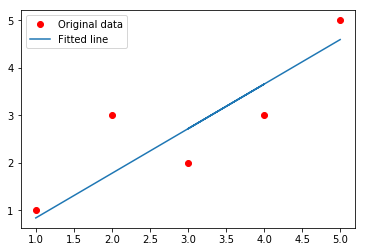

Testing... (Mean square loss Comparison)
Testing cost= 5.47066
Absolute mean square loss difference: 5.20791


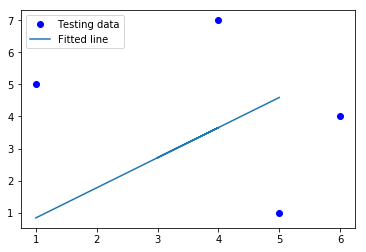

In [2]:

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


init = tf.global_variables_initializer()


with tf.Session() as sess:

   
    sess.run(init)

    
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

   
    test_X = numpy.asarray([5.,6.,4.,1.])
    test_Y = numpy.asarray([1.,4.,7.,5.])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()